In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

#### 0 ---> Early Stage of Deterioration
#### 1 ---> Mid Stage of Deterioration
#### 2 ---> End Stage of Deterioration


#### Concatenate all the training csv files

In [2]:
d1 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_1_all_features.csv')
d2 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_2_all_features.csv')
d3 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_3_all_features.csv')
d4 = pd.read_csv('NASA-s-Turbo-Engine-Remaining-Useful-Life-prediction-using-machine-learning-main\Training_4_all_features.csv')

In [3]:
data_frame = pd.concat([d1,d2,d3,d4])

In [4]:
data_frame.shape

(160359, 26)

In [5]:
data_frame.isnull().sum()

Cycle              0
OpSet1             0
OpSet2             0
OpSet3             0
SensorMeasure1     0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure5     0
SensorMeasure6     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure9     0
SensorMeasure10    0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure14    0
SensorMeasure15    0
SensorMeasure16    0
SensorMeasure17    0
SensorMeasure18    0
SensorMeasure19    0
SensorMeasure20    0
SensorMeasure21    0
labels             0
dtype: int64

In [6]:
X = data_frame.iloc[:,0:25]

In [7]:
X.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
Y = data_frame['labels']

In [9]:
Y.value_counts()

0    95933
2    32348
1    32078
Name: labels, dtype: int64

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True,stratify=Y,random_state=35)

In [11]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier()

### At this point it seems like the Model is subject to overfitting

#### Hyperparameter Optimization

In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators=[200, 400, 300]
# Maximum number of levels in tree
max_depth= [10, 20, 30]
# Max number of samples given to each tree 
max_samples= [0.2,0.3,0.4 ]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples': max_samples}
print(random_grid)

{'n_estimators': [200, 400, 300], 'max_depth': [10, 20, 30], 'max_samples': [0.2, 0.3, 0.4]}


In [13]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_samples': [0.2, 0.3, 0.4],
                                        'n_estimators': [200, 400, 300]})

In [14]:
rf_random.best_params_

{'n_estimators': 300, 'max_samples': 0.4, 'max_depth': 30}

In [15]:
rf_random.best_score_

0.8902323120724022

In [16]:
Rf_randSer = RandomForestClassifier(n_estimators=300,max_samples=0.3,max_depth=30)
Rf_randSer.fit(X_train,Y_train)
new_test_pred = Rf_randSer.predict(X_test)

In [17]:
train_Accuracy_after_optimization = accuracy_score(Y_test,new_test_pred)
train_Accuracy_after_optimization

0.8899975056123721

In [18]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,new_test_pred)
print(cnf_matrix)

[[9041  545    7]
 [ 601 2352  255]
 [   0  356 2879]]


Text(0.5, 355.0, 'Predicted label')

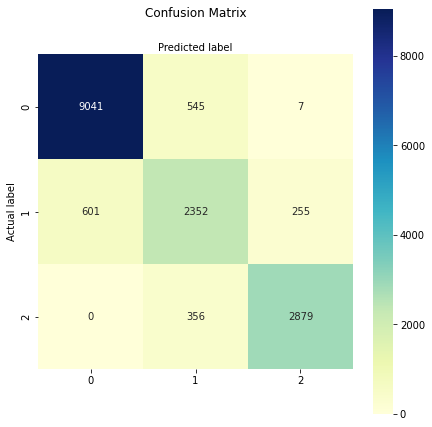

In [19]:
import seaborn as sns
class_names=['0','1','2'] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',square=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
print("0 Predicted as 0: " + str(cnf_matrix[0][0]))
print("0 Mis-Predicted as 1: " + str(cnf_matrix[0][1]))
print("0 Mis-Predicted as 2: " + str(cnf_matrix[0][2]))
print("--------------------------------")
print("1 Mis-Predicted as 0: " + str(cnf_matrix[1][0]))
print("1 Predicted as 1: " + str(cnf_matrix[1][1]))
print("1 Mis-Predicted as 2: " + str(cnf_matrix[1][2]))
print("--------------------------------")
print("2 Mis-Predicted as 0: " + str(cnf_matrix[2][0]))
print("2 Mis-Predicted as 1: " + str(cnf_matrix[2][1]))
print("2 Predicted as 2: " + str(cnf_matrix[2][2]))
print("--------------------------------")


0 Predicted as 0: 9041
0 Mis-Predicted as 1: 545
0 Mis-Predicted as 2: 7
--------------------------------
1 Mis-Predicted as 0: 601
1 Predicted as 1: 2352
1 Mis-Predicted as 2: 255
--------------------------------
2 Mis-Predicted as 0: 0
2 Mis-Predicted as 1: 356
2 Predicted as 2: 2879
--------------------------------


In [21]:
from sklearn import metrics

In [22]:
print("Accuracy:",'%.5f' % metrics.accuracy_score(Y_test, new_test_pred))
print("Precision:",'%.5f' %metrics.precision_score(Y_test, new_test_pred,average = 'weighted'))
print("Recall:",'%.5f' %metrics.recall_score(Y_test, new_test_pred,average = 'weighted'))
print("F1 Score:",'%.5f' %metrics.f1_score(Y_test, new_test_pred,average = 'weighted'))
print(metrics.precision_recall_fscore_support(Y_test, new_test_pred,average = 'weighted'))

Accuracy: 0.89000
Precision: 0.89048
Recall: 0.89000
F1 Score: 0.89019
(0.8904762600603221, 0.8899975056123721, 0.8901865623030585, None)
